## Dependencies

In [164]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import StandardScaler

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [5]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Data Set

In [6]:
raw_dataset_path = '../dataset/raw/'
processed_dataset_path = '../dataset/processed/'
raw_dataset_file = 'Capstone_Dataset_v1.0.csv'
processed_dataset_file = 'Processed_Capstone_Dataset_v1.0.csv'

In [12]:
raw_dataset_full_path = os.path.join(raw_dataset_path, raw_dataset_file)
df = pd.read_csv(raw_dataset_full_path)
print(f"Raw dataset '{raw_dataset_file}' loaded successfully from {raw_dataset_path}")
df.info()

Raw dataset 'Capstone_Dataset_v1.0.csv' loaded successfully from ../dataset/raw/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71357 entries, 0 to 71356
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          71357 non-null  object 
 1   DEPARTMENT  71357 non-null  object 
 2   CATEGORY    71357 non-null  object 
 3   SKU         71357 non-null  object 
 4   Store       71357 non-null  object 
 5   Week        71357 non-null  object 
 6   Units_Sold  71357 non-null  int64  
 7   Net_Price   71357 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 4.4+ MB


## Cleansing and Wrangling

In [13]:
df['Week'] = pd.to_datetime(df['Week'], format='%m/%d/%Y')
df.head()

,ID,DEPARTMENT,CATEGORY,SKU,Store,Week,Units_Sold,Net_Price
0,Store_6_SKU238,Dept13,Category34,SKU238,Store_6,2021-03-31,625,2.04
1,Store_18_SKU329,Dept18,Category42,SKU329,Store_18,2021-03-31,209,26.73
2,Store_3_SKU76,Dept5,Category24,SKU76,Store_3,2021-03-31,2146,21.72
3,Store_16_SKU18,Dept17,Category70,SKU18,Store_16,2021-03-31,317,2.64
4,Store_5_SKU719,Dept43,Category12,SKU719,Store_5,2021-03-31,97,23.82


In [14]:
missing_values = df.isnull().sum()
print("Missing values in the dataset before cleaning:")
print(missing_values)

Missing values in the dataset before cleaning:
ID            0
DEPARTMENT    0
CATEGORY      0
SKU           0
Store         0
Week          0
Units_Sold    0
Net_Price     0
dtype: int64


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df = df.sort_values(by=['Store','DEPARTMENT','CATEGORY','SKU','Week'])
df.reset_index(drop=True, inplace=True)
df.head()

,ID,DEPARTMENT,CATEGORY,SKU,Store,Week,Units_Sold,Net_Price
0,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-03-31,240,3.81
1,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-07,132,5.49
2,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-14,324,3.63
3,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-21,335,3.72
4,Store_1_SKU239,Dept13,Category34,SKU239,Store_1,2021-04-28,146,3.48


In [17]:
# Feature 1: Total Revenue (Units_Sold * Net_Price)
df['Total_Revenue'] = df['Units_Sold'] * df['Net_Price']
df['Net_Price'] = df['Net_Price'].round(2)
df['Total_Revenue'] = df['Total_Revenue'].round(2)

In [18]:
# Feature 2: Extract time-based features from 'Week'
df['Year'] = df['Week'].dt.year
df['Month'] = df['Week'].dt.month
df['Week_Number'] = df['Week'].dt.isocalendar().week

In [19]:
new_column_order = ['ID', 'Store', 'DEPARTMENT', 'CATEGORY', 'SKU', 'Units_Sold', 'Net_Price', 'Total_Revenue', 'Week', 'Year', 'Month', 'Week_Number']
df = df[new_column_order]
print(df.head())

               ID    Store DEPARTMENT    CATEGORY     SKU  Units_Sold  \
0  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         240   
1  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         132   
2  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         324   
3  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         335   
4  Store_1_SKU239  Store_1     Dept13  Category34  SKU239         146   

   Net_Price  Total_Revenue       Week  Year  Month  Week_Number  
0       3.81         914.40 2021-03-31  2021      3           13  
1       5.49         724.68 2021-04-07  2021      4           14  
2       3.63        1176.12 2021-04-14  2021      4           15  
3       3.72        1246.20 2021-04-21  2021      4           16  
4       3.48         508.08 2021-04-28  2021      4           17  


In [20]:
df_cleaned_head = df.head()
df_cleaned_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71357 entries, 0 to 71356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             71357 non-null  object        
 1   Store          71357 non-null  object        
 2   DEPARTMENT     71357 non-null  object        
 3   CATEGORY       71357 non-null  object        
 4   SKU            71357 non-null  object        
 5   Units_Sold     71357 non-null  int64         
 6   Net_Price      71357 non-null  float64       
 7   Total_Revenue  71357 non-null  float64       
 8   Week           71357 non-null  datetime64[ns]
 9   Year           71357 non-null  int32         
 10  Month          71357 non-null  int32         
 11  Week_Number    71357 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 5.8+ MB


In [21]:
df_cleaned_head

,ID,Store,DEPARTMENT,CATEGORY,SKU,Units_Sold,Net_Price,Total_Revenue,Week,Year,Month,Week_Number
0,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,240,3.81,914.40,2021-03-31,2021,3,13
1,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,132,5.49,724.68,2021-04-07,2021,4,14
2,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,324,3.63,1176.12,2021-04-14,2021,4,15
3,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,335,3.72,1246.20,2021-04-21,2021,4,16
4,Store_1_SKU239,Store_1,Dept13,Category34,SKU239,146,3.48,508.08,2021-04-28,2021,4,17


In [23]:
processed_dataset_full_path = os.path.join(processed_dataset_path, processed_dataset_file)
df.to_csv(processed_dataset_full_path, index=False)
print(f"Processed dataset saved successfully as '{processed_dataset_file}' in {processed_dataset_path}.")

Processed dataset saved successfully as 'Processed_Capstone_Dataset_v1.0.csv' in ../dataset/processed/.


## EDA

### Distribution

In [24]:
processed_dataset_full_path = os.path.join(processed_dataset_path, processed_dataset_file)
df = pd.read_csv(processed_dataset_full_path)

In [27]:
unique_stores = df['Store'].nunique()
print(f"Unique Stores: {unique_stores}")

unique_departments = df['DEPARTMENT'].nunique()
print(f"Unique DEPARTMENTs: {unique_departments}")

unique_categories = df['CATEGORY'].nunique()
print(f"Unique CATEGORYs: {unique_categories}")

unique_skus = df['SKU'].nunique()
print(f"Unique SKUs: {unique_skus}")

unique_ID = df['ID'].nunique()
print(f"Unique ID: {unique_ID}")

unique_Week = df['Week'].nunique()
print(f"Number of Weeks: {unique_Week} ranging from {df['Week'].min()} to {df['Week'].max()}")

Unique Stores: 21
Unique DEPARTMENTs: 44
Unique CATEGORYs: 43
Unique SKUs: 401
Unique ID: 499
Number of Weeks: 143 ranging from 2021-03-31 to 2023-12-20


In [28]:
# Columns to choose from for the sunburst path
available_columns = ['Store', 'DEPARTMENT', 'CATEGORY', 'SKU']

# Create checkboxes for the user to select which columns to include in the sunburst
column_select = widgets.SelectMultiple(
    options=available_columns,
    value=available_columns,  # Default value (all columns selected)
    description='Columns',
    disabled=False
)

# Function to update the sunburst chart based on user selection
def update_sunburst(selected_columns):
    # Clear previous output
    clear_output(wait=True)

    # Ensure at least one column is selected
    if len(selected_columns) == 0:
        print("Please select at least one column for the hierarchy.")
        return

    # Generate the sunburst chart with the selected columns
    fig = px.sunburst(
        df,
        path=selected_columns,  # Use selected columns for the sunburst path
        values='Units_Sold',
        title="Hierarchy of Selected Columns (This visualization is interactive, press CMD key to select multiple features.)",
        height=700
    )
    fig.show()

    # Re-display the widget after clearing
    display(column_select)

# Link the function to the widget
column_select.observe(lambda change: update_sunburst(change['new']), names='value')

# Initial display
display(column_select)
update_sunburst(column_select.value)


SelectMultiple(description='Columns', index=(0, 1, 2), options=('Store', 'DEPARTMENT', 'CATEGORY', 'SKU'), val…

In [29]:
unique_values_df = df[['Store', 'DEPARTMENT', 'CATEGORY', 'SKU']].drop_duplicates()
output_file = 'unique_store_department_category_sku.csv'
output_path = os.path.join(processed_dataset_path, output_file)
unique_values_df.to_csv(output_path, index=False)
print(f"'Store', 'DEPARTMENT', 'CATEGORY', and 'SKU' saved successfully to '{output_file}'.")

'Store', 'DEPARTMENT', 'CATEGORY', and 'SKU' saved successfully to 'unique_store_department_category_sku.csv'.


### Imbalance

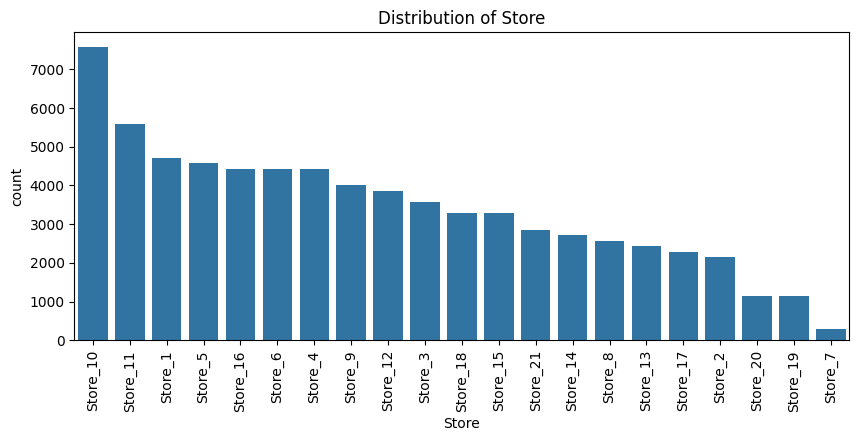

In [31]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Store', order=df['Store'].value_counts().index)
plt.title('Distribution of Store')
plt.xticks(rotation=90)
plt.show()

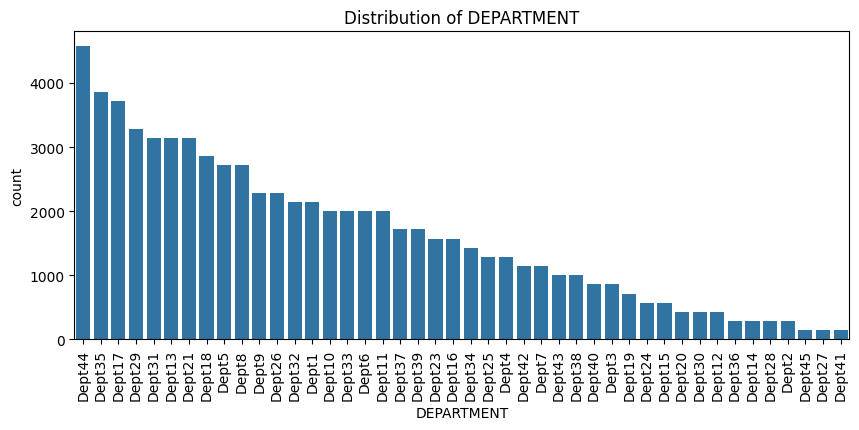

In [83]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='DEPARTMENT', order=df['DEPARTMENT'].value_counts().index)
plt.title('Distribution of DEPARTMENT')
plt.xticks(rotation=90)
plt.show()

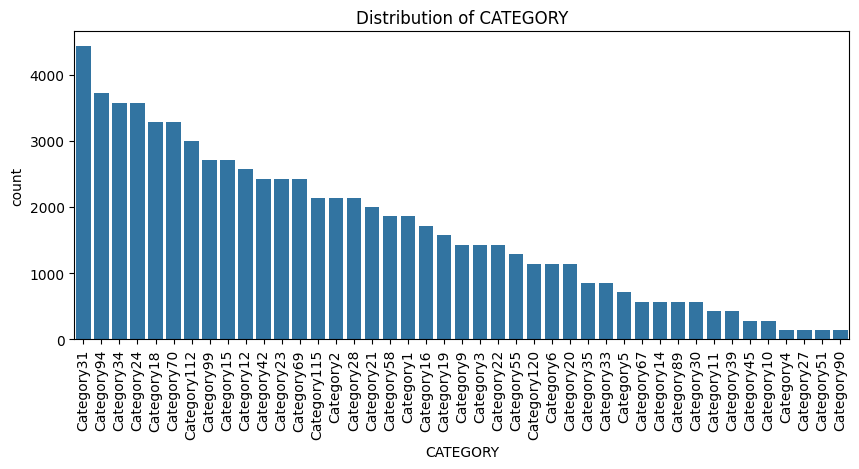

In [84]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='CATEGORY', order=df['CATEGORY'].value_counts().index)
plt.title('Distribution of CATEGORY')
plt.xticks(rotation=90)
plt.show()

## Lag Features

In [39]:
processed_dataset_full_path = os.path.join(processed_dataset_path, processed_dataset_file)
df = pd.read_csv(processed_dataset_full_path)

In [136]:
lag_intervals_100weeks = [1, 2, 4, 8, 12, 16, 20, 24, 36, 52, 65, 78, 91, 104]
lag_intervals_50weeks = [1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 32, 40, 48, 52]

def create_lag_features(group, lag_intervals):
    for lag in lag_intervals:
        group[f'lag_{lag}'] = group['Units_Sold'].shift(lag)
        group[f'lag_{lag}'] = group[f'lag_{lag}'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
    group = group.convert_dtypes()
    
    return group

### Upto 104 weeks

In [137]:
df_lagged = df.groupby('ID').apply(create_lag_features, lag_intervals=lag_intervals_100weeks)
df_lagged = df_lagged.dropna()
df_lagged.head()

ID     Store DEPARTMENT    CATEGORY   SKU  \
ID                                                                          
Store_10_SKU1 11401  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11402  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11403  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11404  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11405  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   

                     Units_Sold  Net_Price  Total_Revenue        Week  Year  \
ID                                                                            
Store_10_SKU1 11401         699      24.69       17258.31  2023-03-29  2023   
              11402         903      18.93       17093.79  2023-04-05  2023   
              11403        1099      20.49       22518.51  2023-04-12  2023   
              11404         753      18.03       13576.59  2023-04-19  2023   
              11405         580      22.17        12858.6  2023-04-26  2023   

                     ...  lag_12  lag_16  lag_20  lag_24  lag_36  lag_52  \
ID                   ...                                                   
Store_10_SKU1 11401  ...    1176     767     790     575     792     804   
              11402  ...     570     852     676     732    1154     762   
              11403  ...     849     578     774     864     867     671   
              11404  ...     729     910    1145     524    1014     825   
              11405  ...     525    1176     767     790    1136     762   

                     lag_65  lag_78  lag_91  lag_104  
ID                                                    
Store_10_SKU1 11401     615     590    1135      933  
              11402     999    1027     913      960  
              11403    1015     835     628      785  
              11404     879     735     641      925  
              11405    1418     848    1320      997  

[5 rows x 26 columns]

In [138]:
output_file = 'Lag_Features_Dataset_104weeks.csv'
output_path = os.path.join(processed_dataset_path, output_file)
df_lagged.to_csv(output_path, index=False)
print(f"Lag Features of 104 weeks (2 years) saved successfully to '{output_file}'.")

Lag Features of 104 weeks (2 years) saved successfully to 'Lag_Features_Dataset_104weeks.csv'.


Units_Sold    1.000000
lag_1         0.894375
lag_2         0.892276
lag_4         0.881770
lag_8         0.855309
lag_12        0.839185
lag_16        0.827868
lag_20        0.819321
lag_24        0.810096
lag_36        0.812324
lag_52        0.827206
lag_65        0.815193
lag_78        0.801383
lag_91        0.789191
lag_104       0.790681
Name: Units_Sold, dtype: float64


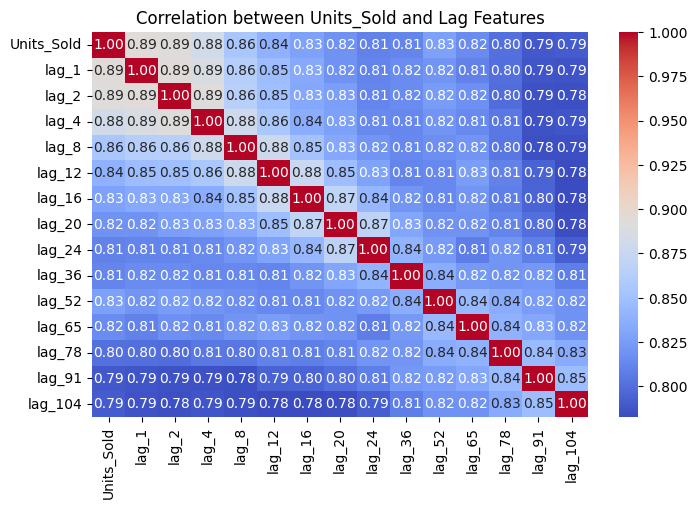

In [139]:
df_corr = df_lagged.dropna()
correlation_matrix = df_corr[['Units_Sold'] + [f'lag_{lag}' for lag in lag_intervals_100weeks]].corr()
print(correlation_matrix['Units_Sold'])
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Units_Sold and Lag Features')
plt.show()

### Upto 52 weeks

In [140]:
df_lagged = df.groupby('ID').apply(create_lag_features, lag_intervals=lag_intervals_50weeks)
df_lagged = df_lagged.dropna()
df_lagged.head()

ID     Store DEPARTMENT    CATEGORY   SKU  \
ID                                                                          
Store_10_SKU1 11349  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11350  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11351  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11352  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   
              11353  Store_10_SKU1  Store_10      Dept4  Category15  SKU1   

                     Units_Sold  Net_Price  Total_Revenue        Week  Year  \
ID                                                                            
Store_10_SKU1 11349         804      17.22       13844.88  2022-03-30  2022   
              11350         762       16.2        12344.4  2022-04-06  2022   
              11351         671      24.39       16365.69  2022-04-13  2022   
              11352         825      22.62        18661.5  2022-04-20  2022   
              11353         762      18.33       13967.46  2022-04-27  2022   

                     ...  lag_8  lag_10  lag_12  lag_16  lag_20  lag_24  \
ID                   ...                                                  
Store_10_SKU1 11349  ...   1150     879     999    1047    1203     835   
              11350  ...    901    1418    1015    1126     689     735   
              11351  ...    793    1150     879    1386     751     848   
              11352  ...    629     901    1418     615    1054     755   
              11353  ...   1068     793    1150     999    1047    1203   

                     lag_32  lag_40  lag_48  lag_52  
ID                                                   
Store_10_SKU1 11349    1175     929     997     933  
              11350    1185    1135     858     960  
              11351    1440     913     761     785  
              11352    1264     628    1181     925  
              11353    1340     641     689     997  

[5 rows x 27 columns]

In [141]:
output_file = 'Lag_Features_Dataset_52weeks.csv'
output_path = os.path.join(processed_dataset_path, output_file)
df_lagged.to_csv(output_path, index=False)
print(f"Lag Features of 52 weeks (1 year) saved successfully to '{output_file}'.")

Lag Features of 52 weeks (1 year) saved successfully to 'Lag_Features_Dataset_52weeks.csv'.


Units_Sold    1.000000
lag_1         0.893455
lag_2         0.889040
lag_3         0.885824
lag_4         0.879562
lag_6         0.866698
lag_8         0.858781
lag_10        0.848106
lag_12        0.842118
lag_16        0.832787
lag_20        0.826179
lag_24        0.820625
lag_32        0.818314
lag_40        0.813465
lag_48        0.823418
lag_52        0.823790
Name: Units_Sold, dtype: float64


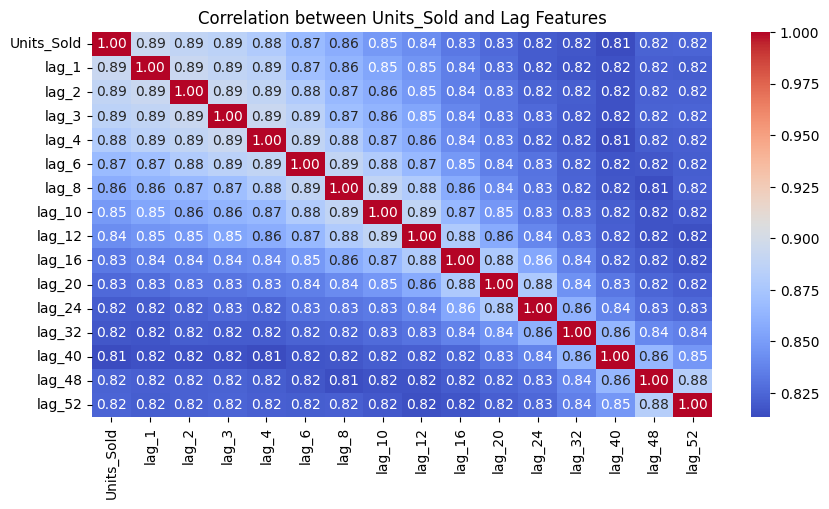

In [142]:
df_corr = df_lagged.dropna()
correlation_matrix = df_corr[['Units_Sold'] + [f'lag_{lag}' for lag in lag_intervals]].corr()
print(correlation_matrix['Units_Sold'])
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Units_Sold and Lag Features')
plt.show()

## Normalized Variance

In [123]:
processed_dataset_full_path = os.path.join(processed_dataset_path, processed_dataset_file)
df = pd.read_csv(processed_dataset_full_path)

In [69]:
scaler = StandardScaler()
df['Units_Sold_Normalized'] = scaler.fit_transform(df[['Units_Sold']])
print(df[['Units_Sold', 'Units_Sold_Normalized']].head())

   Units_Sold  Units_Sold_Normalized
0         240              -0.021205
1         132              -0.392717
2         324               0.267749
3         335               0.305588
4         146              -0.344558


In [117]:
def plot_variance(data, x_column, y_column, title, x_label):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Variance')
    plt.xticks(rotation=90)
    plt.show()

def plot_top_bottom(data, x_column, y_column, title_top, title_bottom, x_label, percentage=20):
    data_sorted = data.sort_values(by=y_column)
    cutoff = int((percentage / 100) * len(data_sorted))
    top_percentage = data_sorted.tail(cutoff)
    bottom_percentage = data_sorted.head(cutoff)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot Top Percentage
    sns.barplot(x=x_column, y=y_column, data=top_percentage, ax=axes[0])
    axes[0].set_title(title_top)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel('Variance')
    axes[0].tick_params(axis='x', rotation=90)
    
    # Plot Bottom Percentage
    sns.barplot(x=x_column, y=y_column, data=bottom_percentage, ax=axes[1])
    axes[1].set_title(title_bottom)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel('Variance')
    axes[1].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

def plotly_boxplot_variance(data, x_column, y_column, title, x_label):
    fig = px.box(data, x=x_column, y=y_column, title=title)
    fig.update_layout(xaxis_title=x_label, yaxis_title='Variance', xaxis_tickangle=-45)
    fig.show()


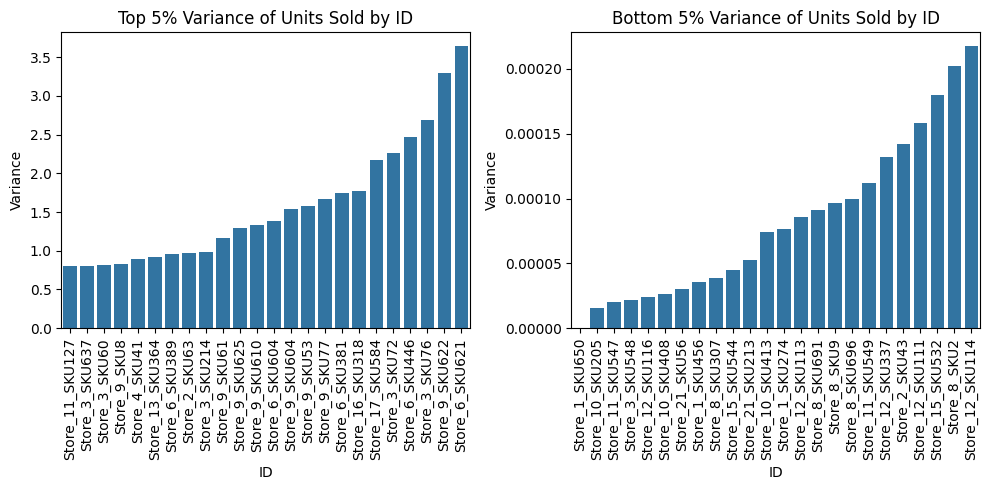

In [89]:
# Variance at ID level
id_variance = df.groupby('ID')['Units_Sold_Normalized'].var().reset_index().rename(columns={'Units_Sold_Normalized': 'ID_Variance'})
percentage=5
plot_top_bottom(id_variance, 'ID', 'ID_Variance', 
                f'Top {percentage}% Variance of Units Sold by ID', 
                f'Bottom {percentage}% Variance of Units Sold by ID', 
                'ID', percentage=percentage)


In [165]:
plotly_boxplot_variance(id_variance, 'ID', 'ID_Variance', 'Variance Distribution by ID', 'ID')

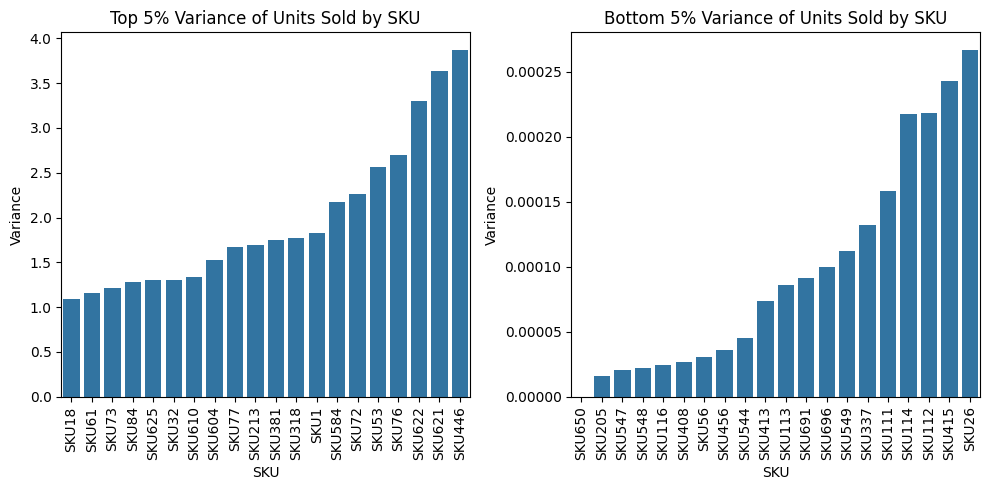

In [93]:
# Variance at SKU level
sku_variance = df.groupby('SKU')['Units_Sold_Normalized'].var().reset_index().rename(columns={'Units_Sold_Normalized': 'SKU_Variance'})
percentage=5
plot_top_bottom(sku_variance, 'SKU', 'SKU_Variance', 
                f'Top {percentage}% Variance of Units Sold by SKU', 
                f'Bottom {percentage}% Variance of Units Sold by SKU', 
                'SKU', percentage=percentage)

In [119]:
plotly_boxplot_variance(sku_variance, 'SKU', 'SKU_Variance', 'Variance Distribution by SKU', 'SKU')

In [118]:
# Variance at CATEGORY level
category_variance = df.groupby('CATEGORY')['Units_Sold_Normalized'].var().reset_index().rename(columns={'Units_Sold_Normalized': 'Category_Variance'})
plotly_boxplot_variance(category_variance, 'CATEGORY', 'Category_Variance', 'Variance Distribution by Category', 'Category')

In [121]:
# Variance at DEPARTMENT level
department_variance = df.groupby('DEPARTMENT')['Units_Sold_Normalized'].var().reset_index().rename(columns={'Units_Sold_Normalized': 'Department_Variance'})
plotly_boxplot_variance(department_variance, 'DEPARTMENT', 'Department_Variance', 'Variance Distribution by Department', 'Department')

In [122]:
# Variance at STORE level
store_variance = df.groupby('Store')['Units_Sold_Normalized'].var().reset_index().rename(columns={'Units_Sold_Normalized': 'Store_Variance'})
plotly_boxplot_variance(store_variance, 'Store', 'Store_Variance', 'Variance Distribution by Store', 'Store')

## Lag Correlation with High/Low Variance

### Lag correlation for High Variance SKU

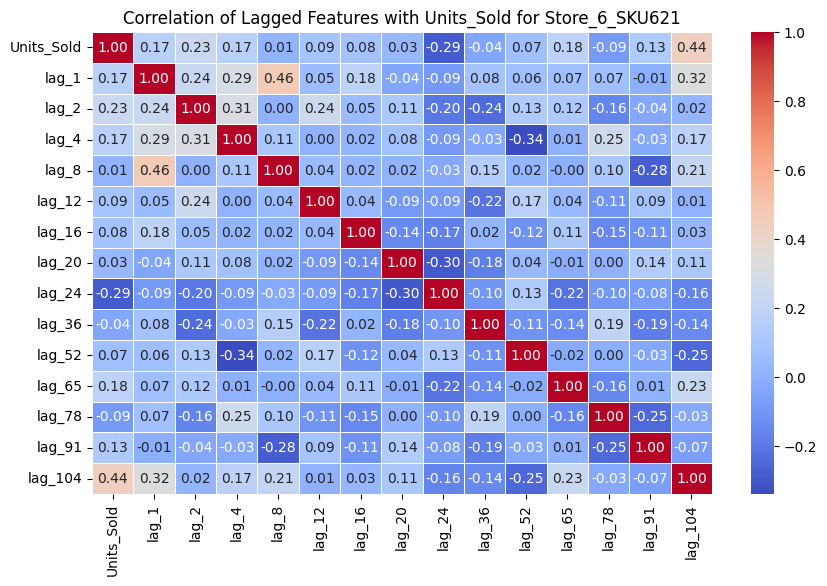

In [155]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_104weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['ID'] == 'Store_6_SKU621']
lagged_features = [f'lag_{i}' for i in lag_intervals_100weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_6_SKU621')
plt.show()

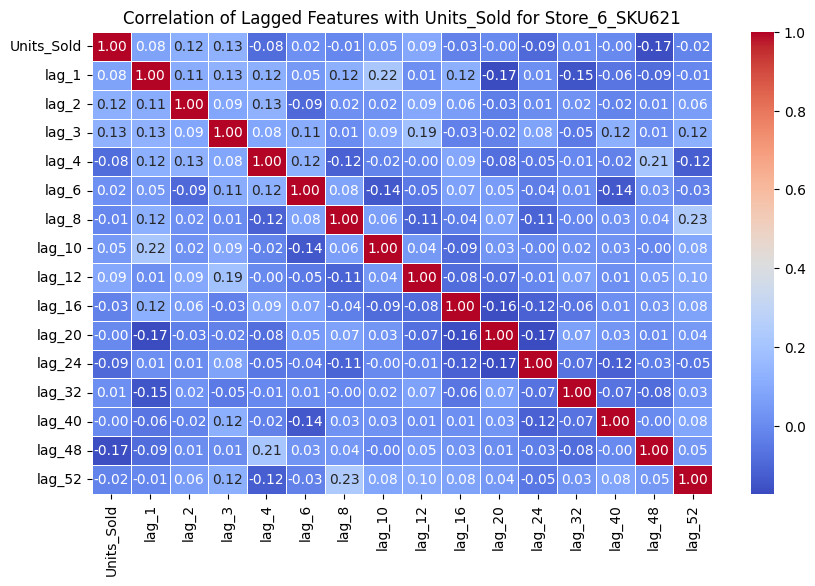

In [157]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_52weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['ID'] == 'Store_6_SKU621']
lagged_features = [f'lag_{i}' for i in lag_intervals_50weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_6_SKU621')
plt.show()

### Lag correlation for Low Variance SKU

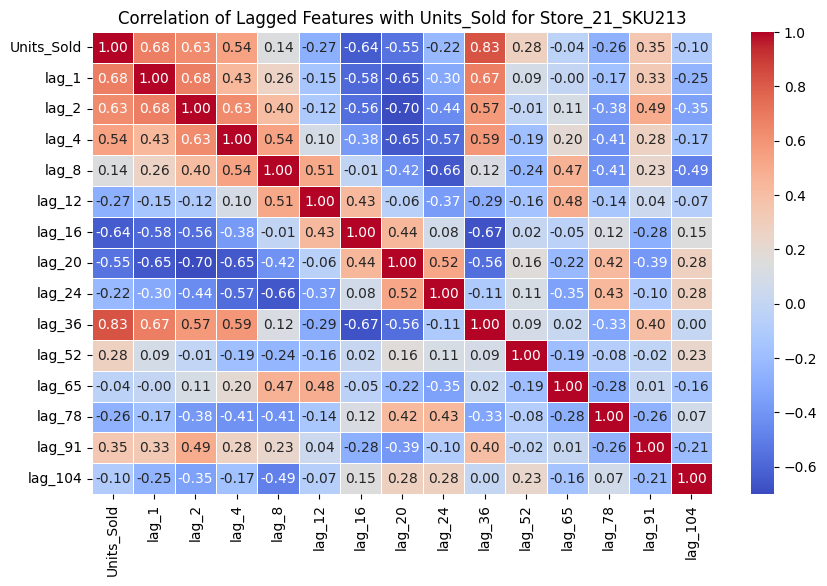

In [158]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_104weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['ID'] == 'Store_21_SKU213']
lagged_features = [f'lag_{i}' for i in lag_intervals_100weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_21_SKU213')
plt.show()

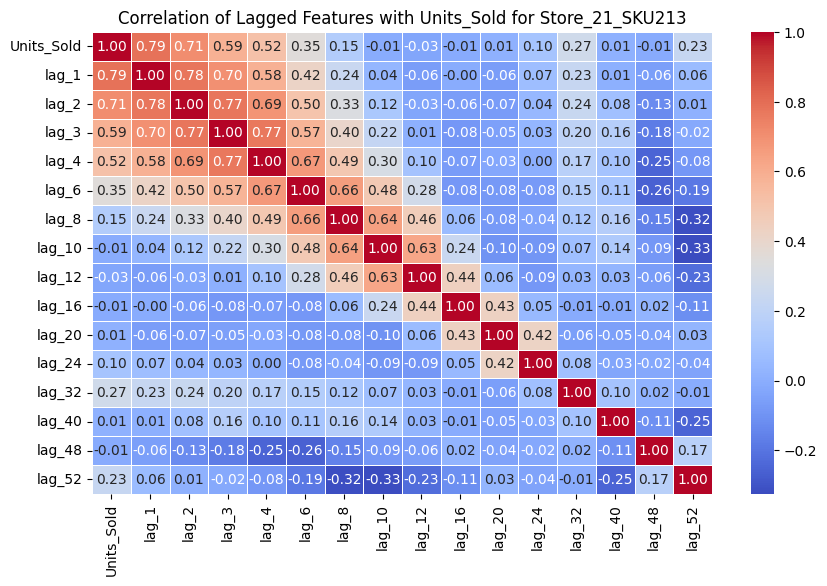

In [159]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_52weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['ID'] == 'Store_21_SKU213']
lagged_features = [f'lag_{i}' for i in lag_intervals_50weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_21_SKU213')
plt.show()

### Lag correlation for High Variance Store

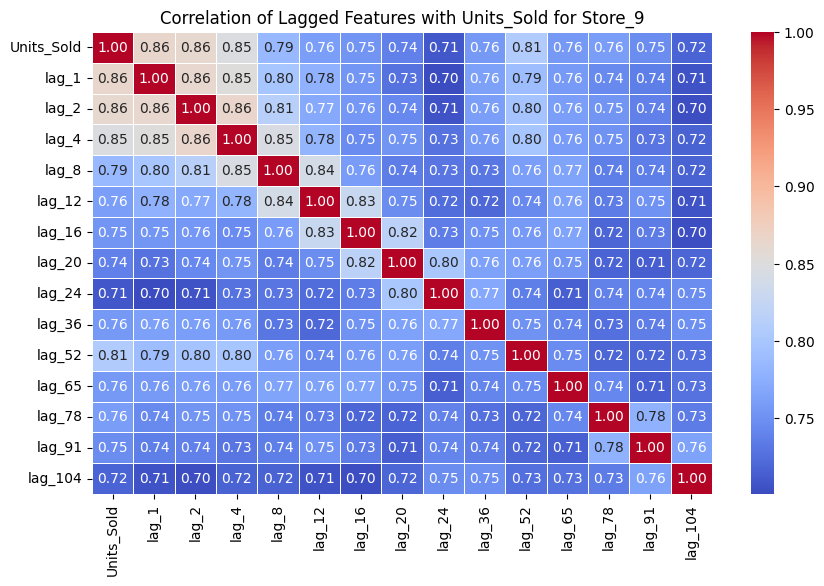

In [160]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_104weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['Store'] == 'Store_9']
lagged_features = [f'lag_{i}' for i in lag_intervals_100weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_9')
plt.show()

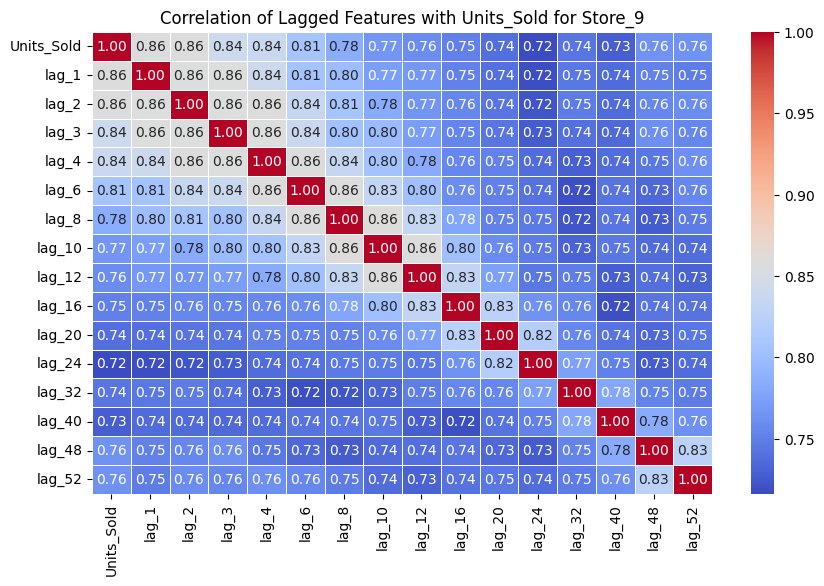

In [161]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_52weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['Store'] == 'Store_9']
lagged_features = [f'lag_{i}' for i in lag_intervals_50weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_9')
plt.show()

### Lag correlation for Low Variance Store

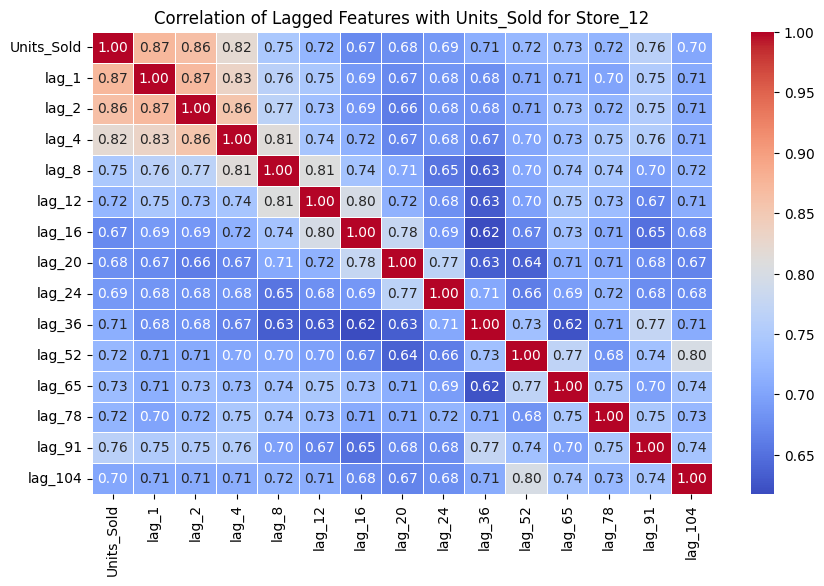

In [162]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_104weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['Store'] == 'Store_12']
lagged_features = [f'lag_{i}' for i in lag_intervals_100weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_12')
plt.show()

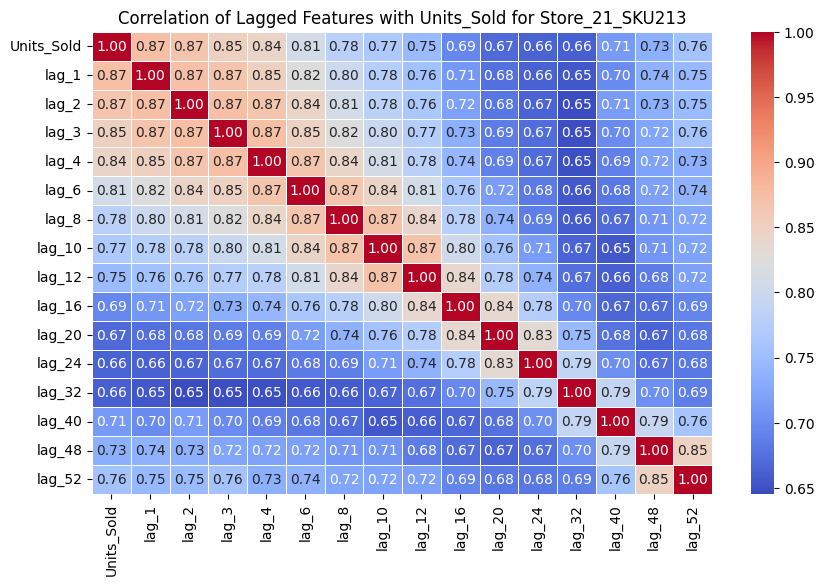

In [163]:
lag_weeks_path = '../dataset/processed/Lag_Features_Dataset_52weeks.csv'
df = pd.read_csv(lag_weeks_path)
filtered_data = df[df['Store'] == 'Store_12']
lagged_features = [f'lag_{i}' for i in lag_intervals_50weeks]
columns_of_interest = ['Units_Sold'] + lagged_features

filtered_data = filtered_data[columns_of_interest]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Lagged Features with Units_Sold for Store_21_SKU213')
plt.show()